# Data Science in Psychology & Neuroscience (DSPN): 

## Lecture 15. Data Visualization (part 2)

### Date: October 19, 2023

### To-Dos From Last Class:

* Install R/RStudio (or IRKernel/Jupyter)
    
### Today:

1. Plot some data
    1. ggplot template
    2. Layers
    3. Grouping the data (Fill & Color)
    4. Other formatting stuff (Themes)
    5. Spotting / labelling outliers

### Homework

* Brainstorm Final Assignment ideas :)

## Reminder: Imitation inhibition task dataset

<img src="img/ait_task.png" width=500>

* 20 trials per condition (100 total responses for each participant)
    * Average across cued response finger
* Condition mapping:
    1. Baseline 
    2. Effector congruent 
    3. Effector incongruent
    4. Movement congruent
    5. Movement incongruent

# Part 1A: Reading in the dataset

* Load the tidyverse package
* Assign filepath
* Read in the data

In [1]:
library(tidyverse)

# read in the data
d_data <- '/Users/jeremyhogeveen/Dropbox/Fall_2023/teaching/PSY450_650/DSPN_Fall2023_Git/misc/imitation_inhibition_paradigm/data/second'
f_trialwise <- paste(d_data,'ait_trialwise.csv',sep='/')

# read in the dataset
df_trialwise <- read_csv(f_trialwise)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 4745 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): Group, pid, Name.1, Name.2, Name.3, Response, Key, Released, Respo...
dbl (15): Time, Finger, Congruence, Repeated, double_response, questionnaire...
lgl  (2): (Trial Variable), Correct

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# 1B. Compute summary RT and error rate (ER) data by participant/condition

## <span style="color:blue">NOTE: I will do the wrangling for you in R for Assignment 4 and 5 starters!</span>

* Normalize conditional RTs by "baseline"
* Recode "Congruence" as a 2 x 2 design
    * Stimulus type: Movement or Effector
    * Stimulus/Response Compatibility: Congruent or Incongruent
* Recode "Error Code" as an integer
    * Useful for calculateing ER
* Compute summary statistics

In [2]:
# Normalizing effector / movement conditions by baseline

# pull the baseline, compute base RT for each participant
df_baseline <- df_trialwise %>%
    filter(Congruence==0) %>%
    group_by(pid) %>%
    summarise(RT_base=mean(Time))

# filter to just other conditions, merge baseline RTs back in, use to compute normalized RT
df_wconditions <- df_trialwise %>%
    filter(Congruence != 0) %>%
    merge(df_baseline,by = "pid") %>%
    group_by(pid) %>%
    mutate(RT_sd = sd(Time),
        RT_norm = (Time - RT_base) / sd(Time)) #%>%
#     select(RT_sd,Time,RT_base,RT_norm)
# head(df_conditions,5)

# separating Congruence factor into 2 variables for easy ggplot coding
df_wconditions <- df_wconditions %>%
    mutate(str_condi = ifelse(Congruence==1,'eff_con',
                              ifelse(Congruence==2,'eff_inc',
                                     ifelse(Congruence==3,'move_con',
                                            ifelse(Congruence==4,'move_inc','')))),
           stim_type = ifelse(grepl('^eff',str_condi), "Effector", "Movement"),
           sr_congruence = ifelse(grepl('con$', str_condi), "Congruent", "Incongruent"),
           error = ifelse(Code=="C",0,1))

In [3]:
df_wconditions %>% 
    group_by(stim_type,sr_congruence) %>% 
    summarise(RT_mean = mean(RT_norm),
              N = n(),
              ER_mean = sum(error)/N) 

`summarise()` has grouped output by 'stim_type'. You can override using the
`.groups` argument.


stim_type,sr_congruence,RT_mean,N,ER_mean
<chr>,<chr>,<dbl>,<int>,<dbl>
Effector,Congruent,-0.1857117,944,0.01165254
Effector,Incongruent,0.1729082,946,0.04228330
Movement,Congruent,-0.4572500,946,0.02325581
Movement,Incongruent,0.1143616,957,0.06374086


In [4]:

# getting a data frame summarized by all condis
df_sum <- df_wconditions %>% 
    group_by(pid,str_condi) %>% 
    summarise(N = n(),
              RT_mean = mean(RT_norm),
              ER_mean = sum(error) / N)

`summarise()` has grouped output by 'pid'. You can override using the `.groups`
argument.


# 2A. ggplot template

* Note: ggplot reference for different geom_functions etc.
    * https://ggplot2.tidyverse.org/reference/

In [5]:
# ggplot(data = <DATA>) + 
#   <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>)) 

# ggplot initiates a blank plot object
# aes = aesthetic mappings
# geom_functions = geometric objects

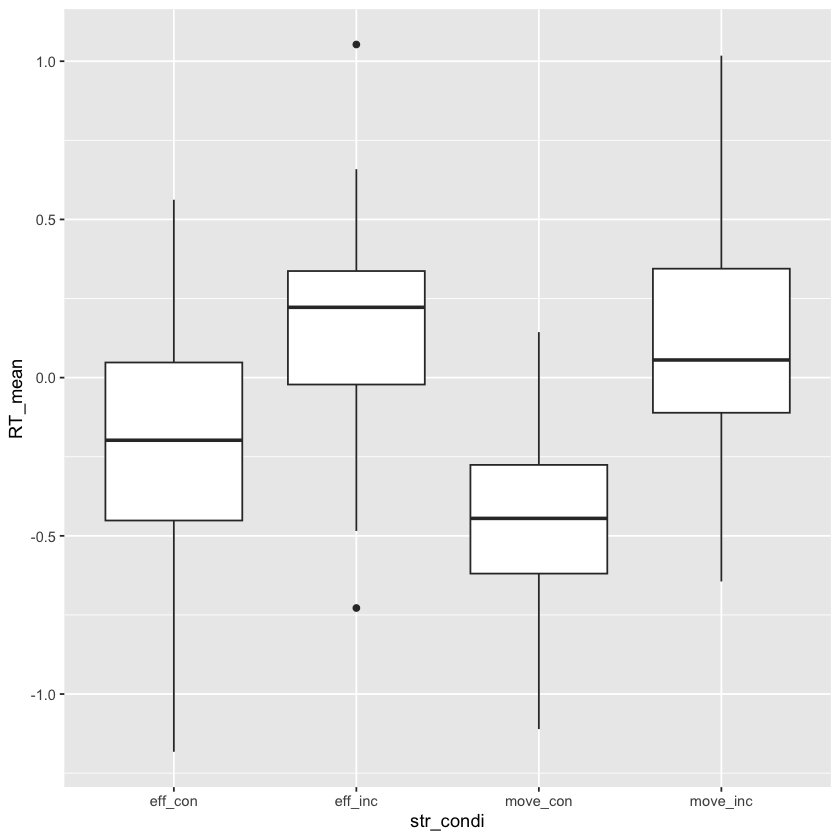

In [6]:
ggplot(df_sum,aes(x = str_condi,y = RT_mean)) + 
    geom_boxplot()

# 2B. Layers

* Can layer as many different geometric objects (i.e., geom_ thingys) as you like!

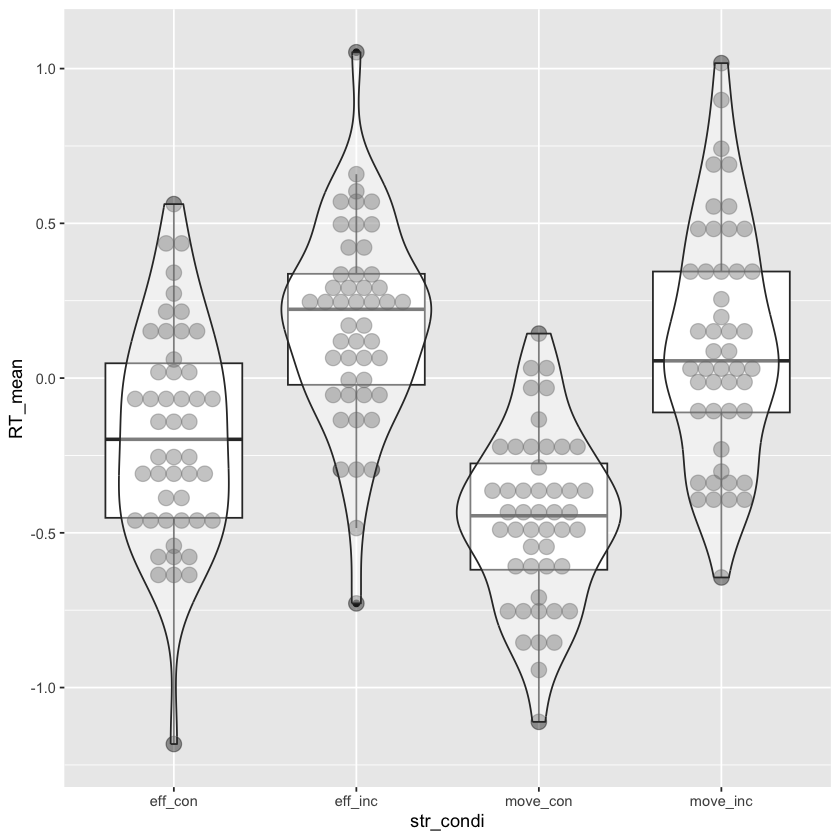

In [7]:
ggplot(df_sum,aes(x = str_condi,y = RT_mean)) + 
    geom_boxplot() +
    geom_dotplot(alpha=0.4,binaxis='y',binwidth=0.05,stackdir='center') +
    geom_violin(alpha=0.4)

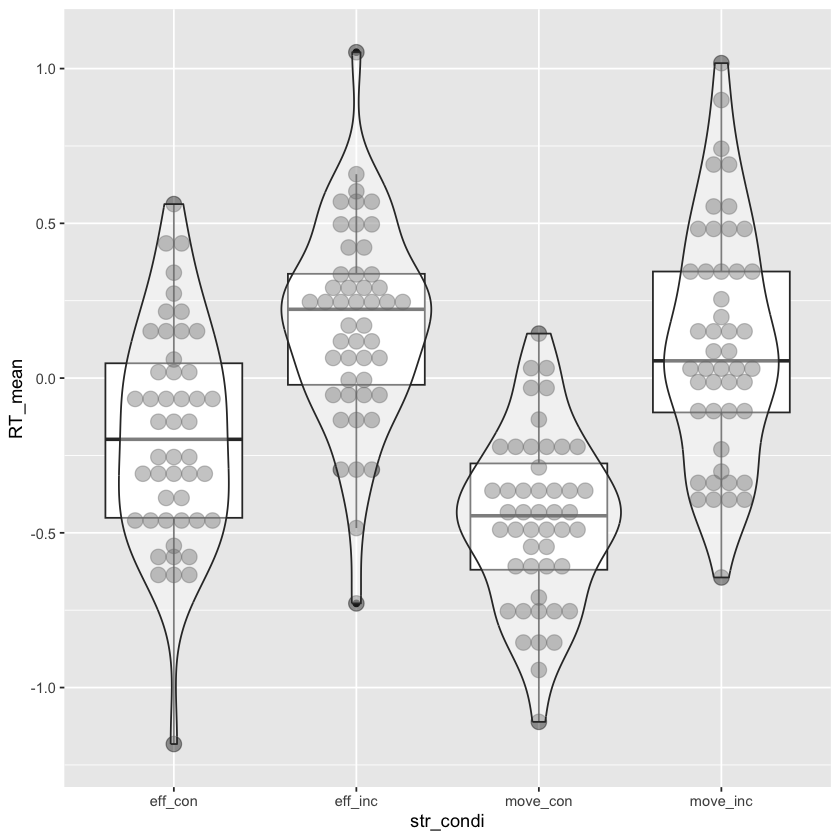

In [8]:
ggplot(df_sum) + 
    geom_boxplot(aes(x = str_condi,y = RT_mean)) +
    geom_dotplot(aes(x = str_condi,y = RT_mean),alpha=0.4,binaxis='y',binwidth=0.05,stackdir='center') +
    geom_violin(aes(x = str_condi,y = RT_mean),alpha=0.4)

# 2C. Grouping the data (e.g. for visualizing interactions between factors)

* Plotting stim type BY sr_comp interaction
* Noting the difference between _fill_ and _colour_
    * Fill --> specifying colour to fill a geom
    * Colour --> specifying colour to outline a geom

`summarise()` has grouped output by 'pid', 'stim_type'. You can override using
the `.groups` argument.


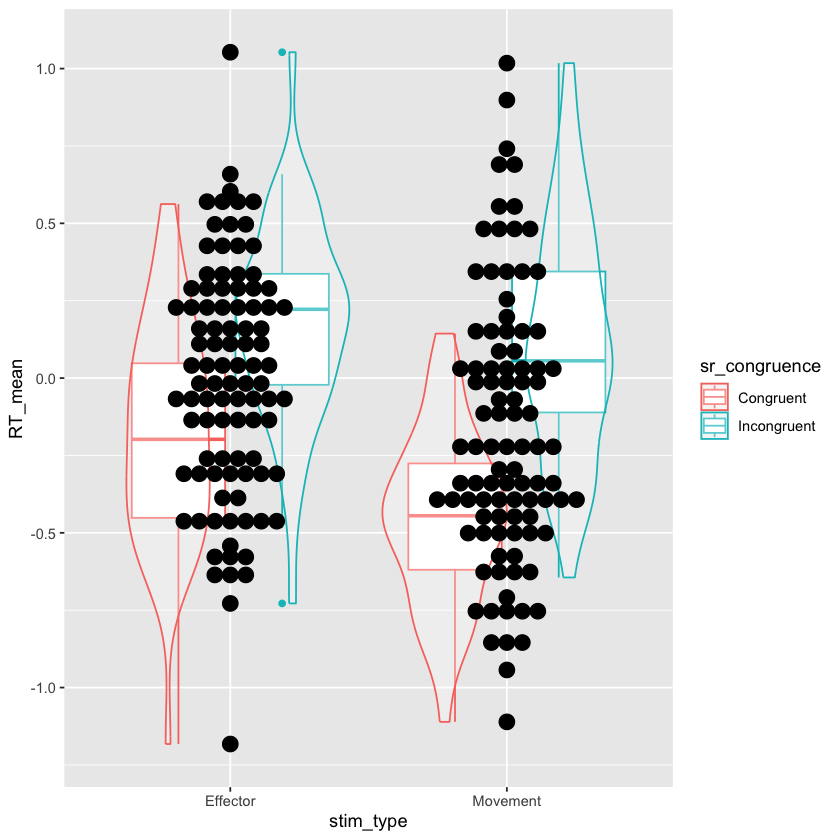

In [9]:
# getting a 2x2 factorial data frame summarized by stim_type and sr_congruence
df_2x2_sum <- df_wconditions %>% 
    group_by(pid,stim_type,sr_congruence) %>% 
    summarise(N = n(),
              RT_mean = mean(RT_norm),
              ER_mean = sum(error) / N)

# attempting a grouped plot
ggplot(df_2x2_sum,aes(x = stim_type, y = RT_mean, colour = sr_congruence)) +
    geom_boxplot() +
    geom_violin(alpha=0.3) + 
    geom_dotplot(color="black",binaxis='y',binwidth=0.05,stackdir='center')

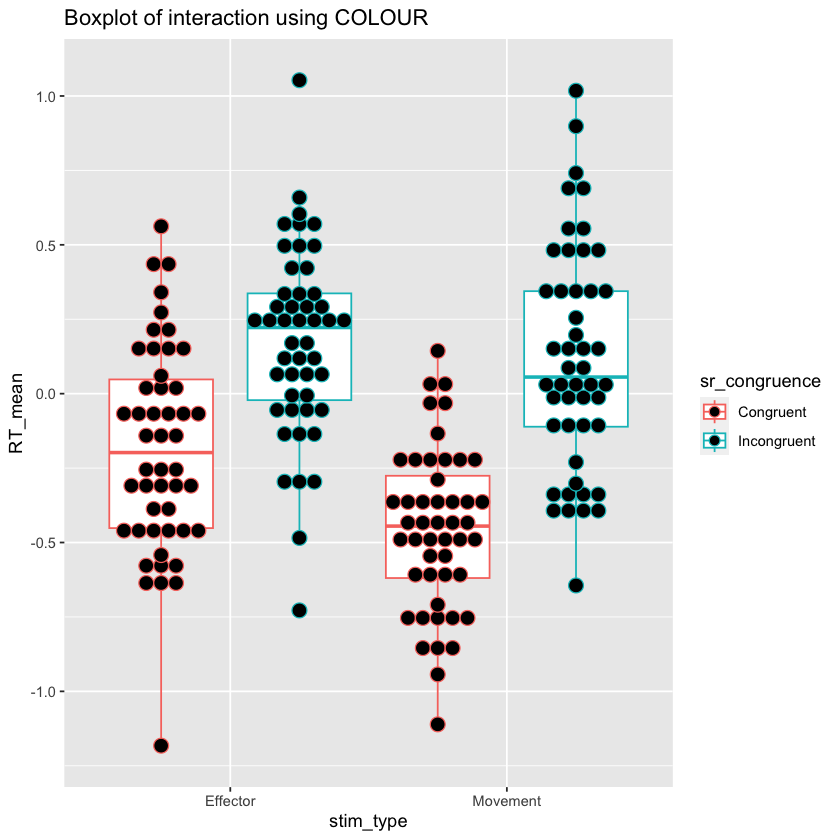

In [10]:
# fixing the position for the interaction plots using position_dodge
dodge <- position_dodge(1)

# plotting with COLOUR
ggplot(df_2x2_sum, aes(x = stim_type, y = RT_mean, colour = sr_congruence)) + 
    geom_boxplot(position=dodge) +
    geom_dotplot(position=dodge,binaxis='y',binwidth=0.05,stackdir='center') +
    ggtitle('Boxplot of interaction using COLOUR')

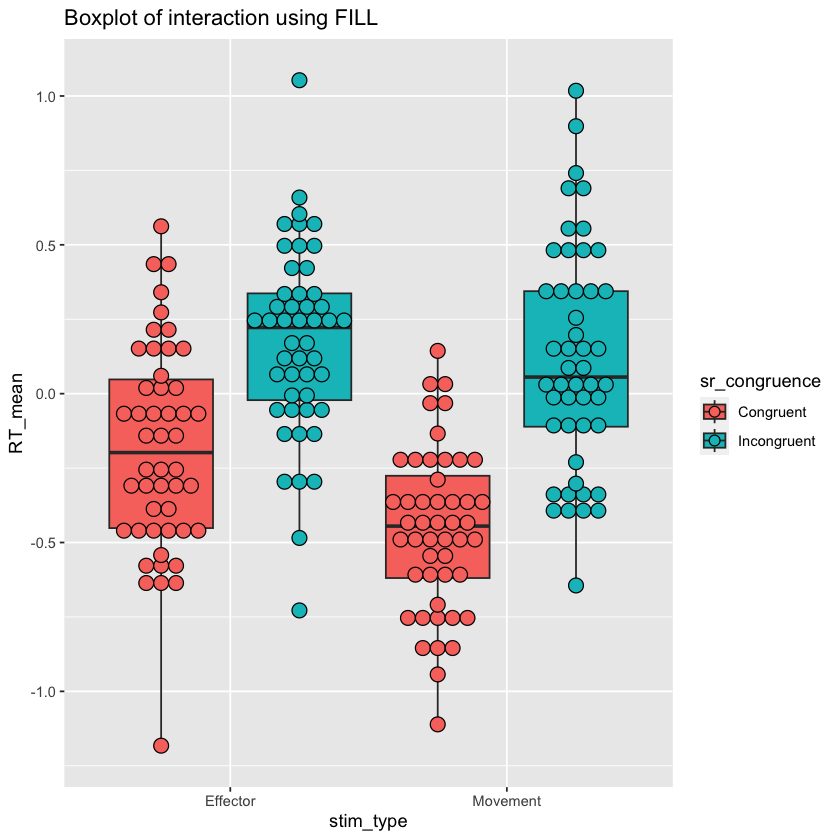

In [11]:
# plotting with FILL
ggplot(df_2x2_sum, aes(x = stim_type, y = RT_mean, fill = sr_congruence)) + 
    geom_boxplot(position=dodge) +
    geom_dotplot(position=dodge,binaxis='y',binwidth=0.05,stackdir='center') +
    ggtitle('Boxplot of interaction using FILL')

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




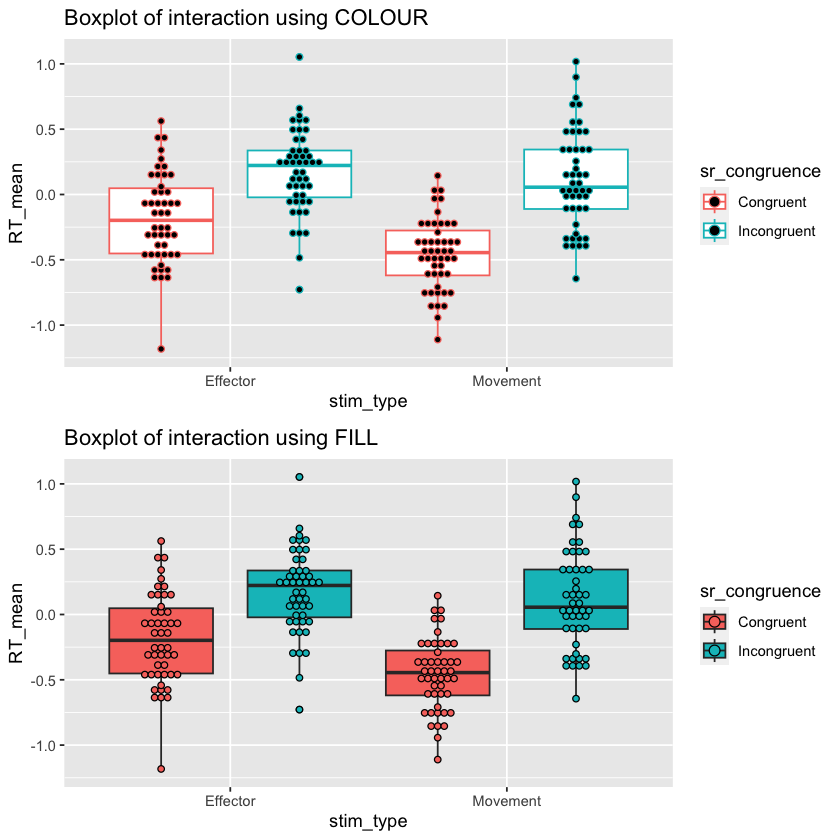

In [12]:
 # panelling them side by side 

# plotting with COLOUR
p_bycolor <- ggplot(df_2x2_sum, aes(x = stim_type, y = RT_mean, colour = sr_congruence)) + geom_boxplot(position=dodge) + geom_dotplot(position=dodge,binaxis='y',binwidth=0.05,stackdir='center') + ggtitle('Boxplot of interaction using COLOUR')

# plotting with FILL
p_byfill <- ggplot(df_2x2_sum, aes(x = stim_type, y = RT_mean, fill = sr_congruence)) + geom_boxplot(position=dodge) + geom_dotplot(position=dodge,binaxis='y',binwidth=0.05,stackdir='center') + ggtitle('Boxplot of interaction using FILL')

# install this!
require(gridExtra)
grid.arrange(p_bycolor, p_byfill, nrow=2)

# 2D. Formatting the plots (Themes)

* Plot outline / background
* Axis labels

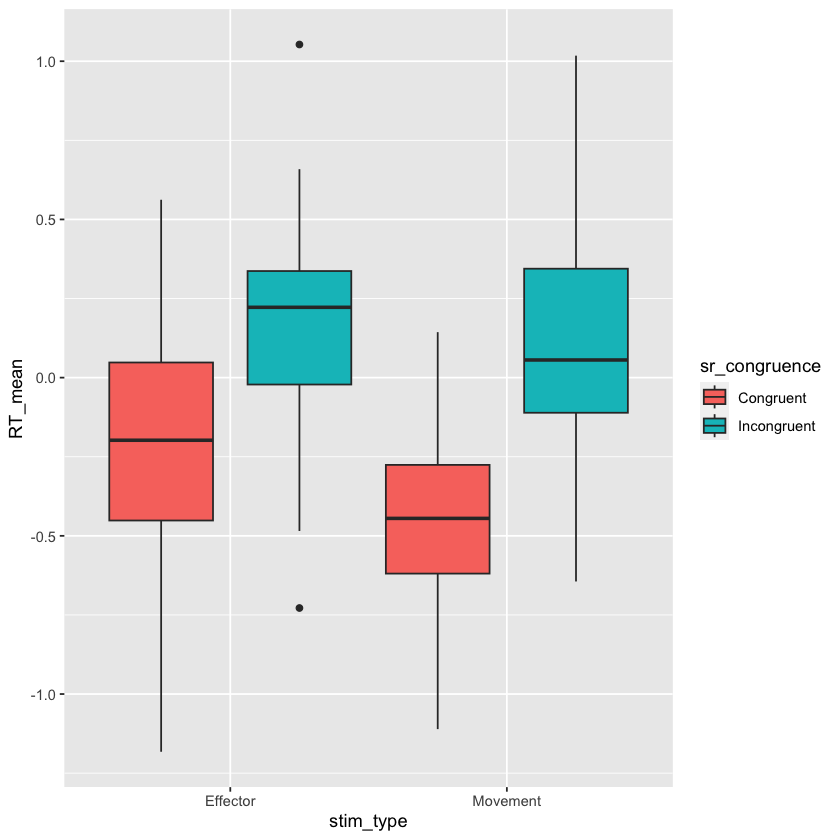

In [13]:
# Piping data frame into ggplot call
default_format <- ggplot(df_2x2_sum,aes(x = stim_type, y = RT_mean, fill = sr_congruence)) +
    geom_boxplot(position=dodge)
plot(default_format) # notice we need to explicitly "PLOT" when the ggplot call is assigned to an object

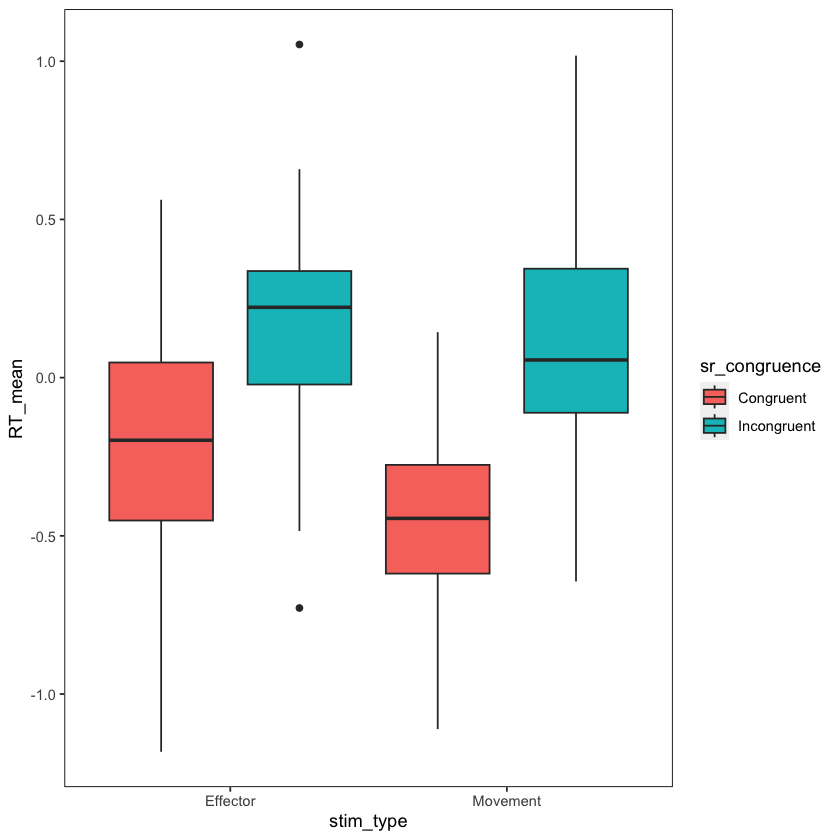

In [14]:
default_format + 
    theme(panel.background = element_rect(fill = "#ffffff", color  =  NA), # grid panels = white, no outline color
    panel.border = element_rect(fill = NA, color = "black")) # grid border = no fill, black outline

In [15]:
# some stuff you can steal for customizing data visualizations:

# Many palettes available online, can customize
# these are from: https://colorbrewer2.org/#type=qualitative&scheme=Set1&n=9
my_palette <- c("#0000FF","#FF0000","#3ADF00","#ff7f00","#6a3d9a",
                "#a6cee3","#b2df8a","#fb9a99","#fdbf6f","#cab2d6",
                "#8dd3c7","#bebada","#d9d9d9","#fccde5","#ffffb3")

# This is the basic function I use for all the ggplots I create. 
# Modified from this black themed ggplot function: https://gist.github.com/jslefche/eff85ef06b4705e6efbc
my_theme = function(base_size = 24, base_family = "") {
  
  theme_grey(base_size = base_size, base_family = base_family) %+replace%
    
    theme(
      # Specify axis options
      axis.line = element_blank(),  
      axis.text.x = element_text(size = base_size*0.8, color = "black", lineheight = 0.9),  
      axis.text.y = element_text(size = base_size*0.8, color = "black", lineheight = 0.9),  
      axis.ticks = element_line(color = "black", size  =  0.2),
      axis.title.x = element_text(size = base_size, color = "black", margin = margin(10, 0, 0, 0)),
      axis.title.y = element_text(size = base_size, color = "black", angle = 90, margin = margin(0, 10, 0, 0)),  
      axis.ticks.length = unit(0.3, "lines"),   
      # Specify legend options
      legend.background = element_rect(color = NA, fill = "#ffffff"),  
      legend.key = element_rect(color = "black",  fill = "#ffffff"),  
      legend.key.size = unit(2, "lines"),  
      legend.key.height = NULL,  
      legend.key.width = NULL,      
      legend.text = element_text(size = base_size*0.8, color = "black"),  
      legend.title = element_text(size = base_size*0.8, face = "bold", hjust = 0, color = "black"),
      legend.position = "right",  
      legend.text.align = NULL,  
      legend.title.align = NULL,  
      legend.direction = "vertical",  
      legend.box = NULL, 
      # Specify panel options
      panel.background = element_rect(fill = "#ffffff", color  =  NA),  
      panel.border = element_rect(fill = NA, color = "black"),  
      panel.grid.major = element_line(color = "#ffffff"),  
      panel.grid.minor = element_line(color = "#ffffff"),  
      panel.spacing = unit(2, "lines"),
      # Specify facetting options
      strip.background = element_rect(fill = "grey30", color = "grey10"),  
      strip.text.x = element_text(size = base_size*0.8, color = "black"),  
      strip.text.y = element_text(size = base_size*0.8, color = "black",angle = -90),  
      # Specify plot options
      plot.background = element_rect(color = "#ffffff", fill = "#ffffff"),  
      plot.title = element_text(size = base_size*1.2, color = "black"),  
      plot.margin = unit(rep(1, 4), "lines")
    ) 
}

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


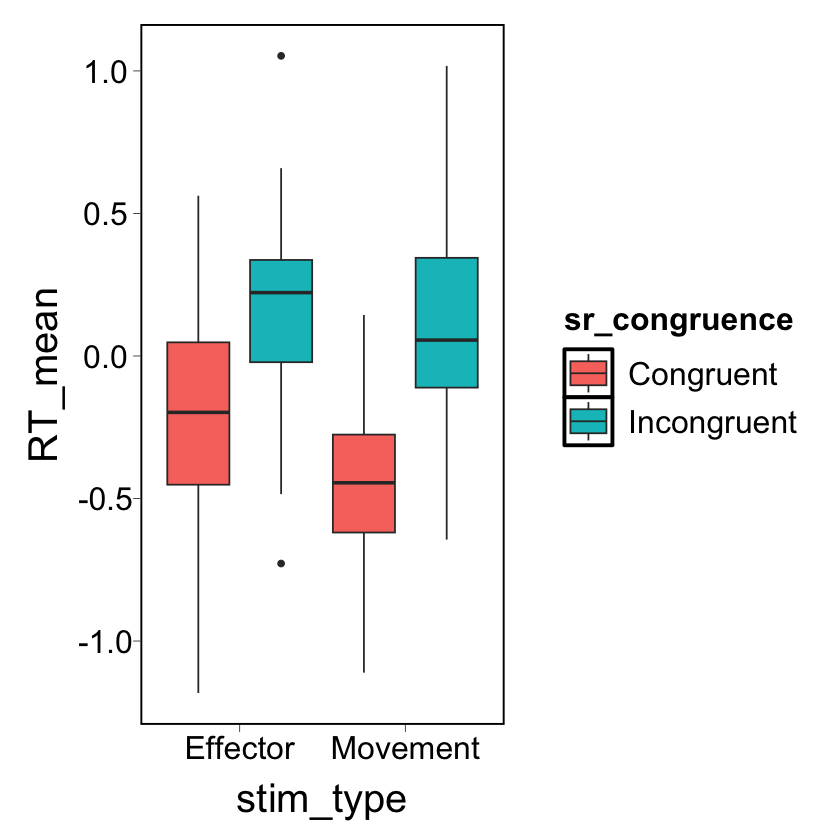

In [16]:
default_format + 
    my_theme()

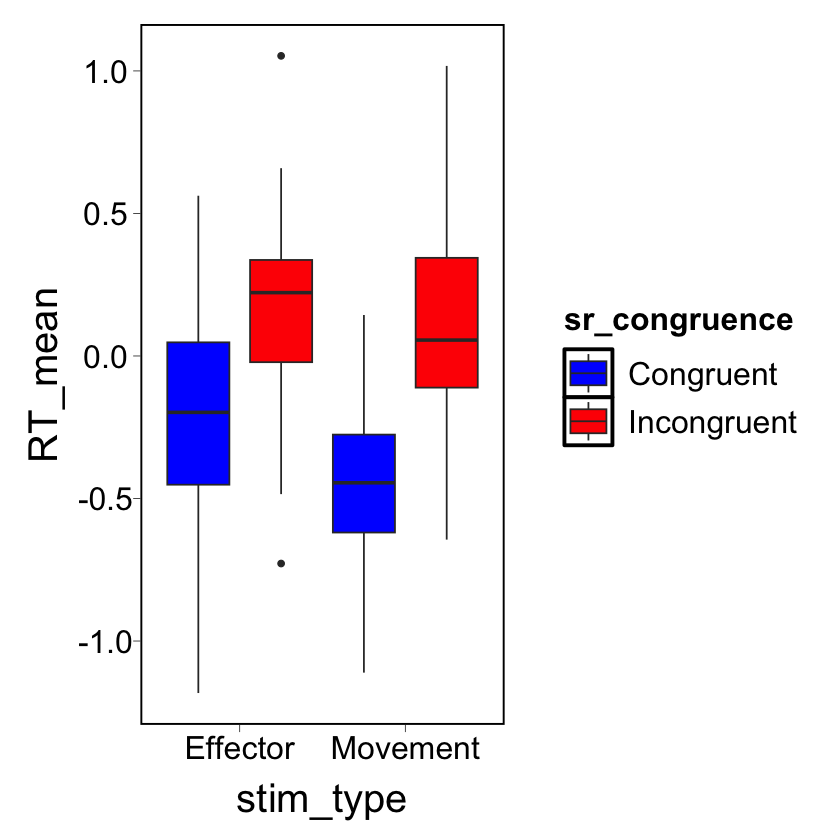

In [17]:
default_format + 
    my_theme() + 
    scale_fill_manual(values=my_palette)

# 2E. Spotting + Labeling Outliers

* Plotting speed-accuracy tradeoff scatter
* Labelling points by participant ID to figure out who I should look into further

`summarise()` has grouped output by 'pid', 'stim_type'. You can override using
the `.groups` argument.


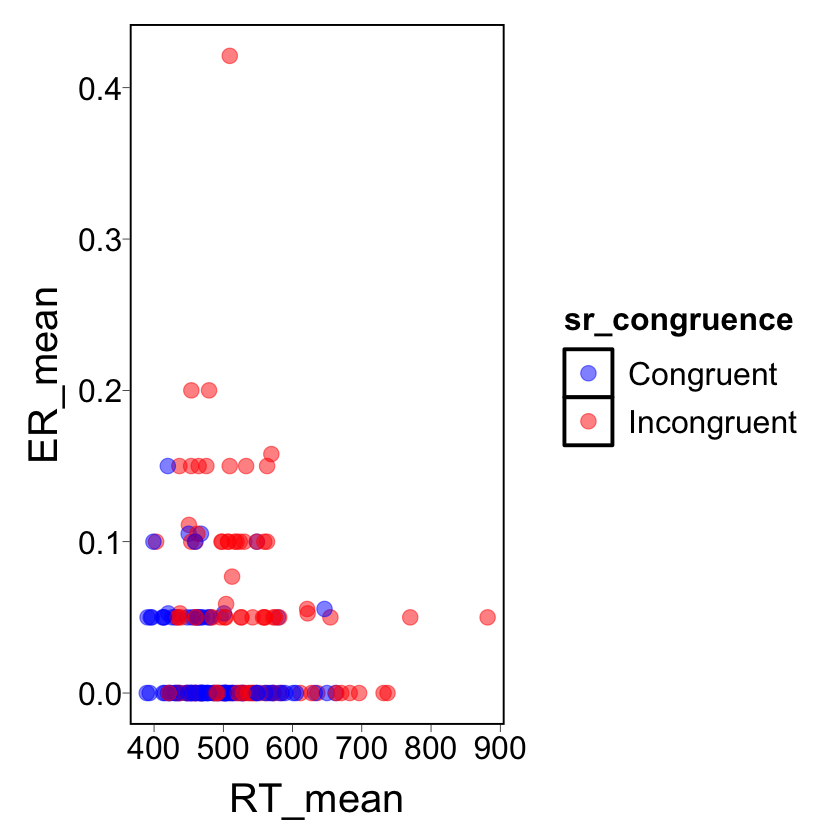

In [18]:
# getting a 2x2 factorial data frame summarized by stim_type and sr_congruence
df_2x2_rawRTs <- df_wconditions %>% 
    group_by(pid,stim_type,sr_congruence) %>% 
    summarise(N = n(),
              RT_mean = mean(Time),
              ER_mean = sum(error) / N)

# plot of the speed-accuracy tradeoff
ggplot(df_2x2_rawRTs, aes(x = RT_mean, y = ER_mean, colour = sr_congruence)) +
    geom_point(size = 4, alpha=0.5) +
    my_theme() +
    scale_colour_manual(values = my_palette)

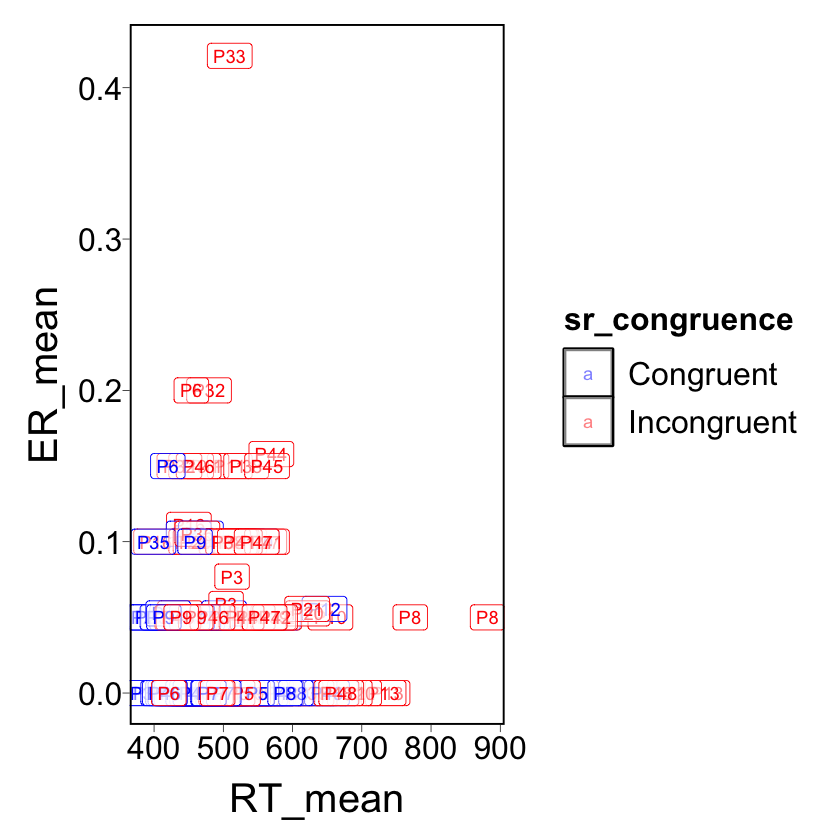

In [19]:
# adding labels
ggplot(df_2x2_rawRTs,aes(x = RT_mean, y = ER_mean, colour=sr_congruence, label=pid)) + 
    geom_label(alpha=0.5) +
    my_theme() +
    scale_colour_manual(values=my_palette)

# 2F. Making a Mean +/- SEM plot __after__ you know your data 

* compute 2x2 RT summary _across_ participants
* plot mean +/- SEM

In [20]:
# take the 2x2 summary df and collapse across PID
df_2x2_sum_acrossSubjects <- df_2x2_sum %>%
    group_by(stim_type,sr_congruence) %>%
    summarise(N = n(),
              RT = mean(RT_mean),
              SD = sd(RT_mean),
              SEM = SD / sqrt(N))
print(df_2x2_sum_acrossSubjects)

`summarise()` has grouped output by 'stim_type'. You can override using the
`.groups` argument.


# A tibble: 4 × 6
# Groups:   stim_type [2]
  stim_type sr_congruence     N     RT    SD    SEM
  <chr>     <chr>         <int>  <dbl> <dbl>  <dbl>
1 Effector  Congruent        48 -0.184 0.348 0.0502
2 Effector  Incongruent      48  0.175 0.320 0.0462
3 Movement  Congruent        48 -0.457 0.273 0.0395
4 Movement  Incongruent      48  0.116 0.378 0.0545


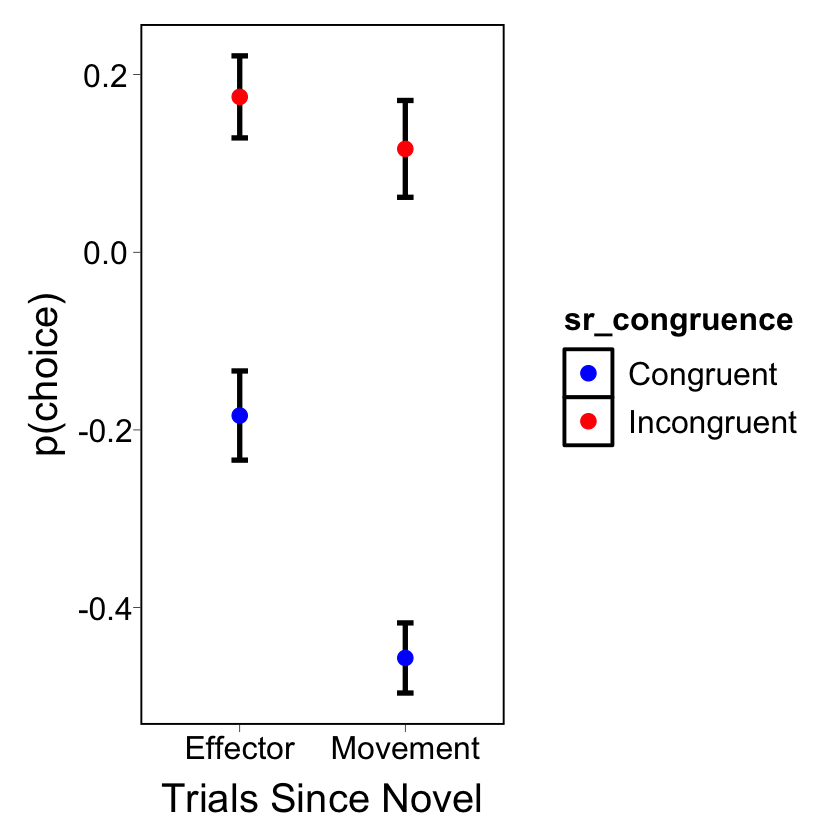

In [33]:
# setting up SEM error bars
aes_plot_errorbars <- aes(ymax = df_2x2_sum_acrossSubjects$RT + df_2x2_sum_acrossSubjects$SEM, ymin=df_2x2_sum_acrossSubjects$RT - df_2x2_sum_acrossSubjects$SEM)

# plotting a mean_summary_plot
p_mean_plot <- 
  ggplot(df_2x2_sum_acrossSubjects, aes(x = stim_type, y = RT, color = sr_congruence)) +
    geom_errorbar(aes_plot_errorbars,position=dodge, width=0.1, size=1.5,colour="black") +
    geom_point(size=4,shape=19) + #, shape=5 #http://www.sthda.com/english/wiki/ggplot2-point-shapes
    xlab('Trials Since Novel') +
    ylab('p(choice)') +
    my_theme() +
    scale_colour_manual(values=my_palette)
p_mean_plot